## Tomato Leaf Disease Classification using CNN -  MobileNetV2 - Transfer Learning based approach.



Name: Sartaj Sudheer Babu

---


Student ID: 220684636

**Extracting the dataset from the disk**

In [ ]:
import zipfile

zip_path = '/content/Tomato_ Train_Valid.zip'  # Replace with the path to your zip file

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Replace with the path to the directory where you want to extract the files


In [ ]:
import zipfile

# Path to the zip file
zip_path = '/content/Tomato_ Train_Valid.zip'

# Path to the directory where you want to extract the files
extract_path = '/content/extract'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed.")

In [ ]:
!7z x Tomato_Train_Valid.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         
ERROR: No more files
Tomato_Train_Valid.zip



System ERROR:
Unknown error -2147024872


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**To ensure GPU is allocated**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

**Path to Directories containing images and setting input image size**

In [ ]:
train_path = '/content/Tomato_ Train_Valid/train'
valid_path = '/content/Tomato_ Train_Valid/val'
IMAGE_SIZE = [224, 224]

**Loading MobileNetV2 pre-trained on ImageNet without the top layer**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SIZE + [3],
                                               include_top=False,
                                               weights='imagenet')

Number of layers in the base model

In [ ]:
len(base_model.layers)

154

**Freezing the base model**

In [ ]:
base_model.trainable = True

**model.summary() function for displaying the architecture of the base model.**

In [ ]:
base_model.summary()

**Getting the number of classses**

In [ ]:
folders = glob('/content/Tomato_ Train_Valid/train/*')
num_classes = len(folders)
num_classes


10

**Building the complete model architecture by adding a classification head to the base model.**

In [ ]:
h1 = BatchNormalization()(base_model.output)
h2 = Dense(128,activation = 'relu')(h1)
h3 = Dropout(0.5)(h2)
h4 = Dense(64,activation = 'relu')(h3)
h5 = BatchNormalization()(h4)
h6 = Flatten()(h5)
prediction = Dense(num_classes, activation='softmax')(h6)
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

**Compile the model**

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Data Augmentation and preprocessing**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2, # apply shear transformation randomly within the range of 0.2
                                   rotation_range = 20, # rotate images randomly within the range of 20 degrees
                                   width_shift_range = 0.2, #  Shift the width of images randomly within the range of 0.2
                                   height_shift_range = 0.2, # Shift the height of images randomly within the range of 0.2
                                   zoom_range = 0.2, # Zoom into images randomly within the range of 0.2
                                   horizontal_flip = True  # Flip images horizontally randomly
)

valid_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 10892 images belonging to 10 classes.
Found 3628 images belonging to 10 classes.


For saving the model after every 10 epochs

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint('/content/saved_models/model-{epoch:01d}.h5', save_weights_only=False, period=3)


**Training the model**

In [ ]:
history= model.fit(
    training_set,
    validation_data=valid_set,
    epochs=100,
    steps_per_epoch=len(training_set),
    validation_steps=len(valid_set),
    callbacks=[checkpoint]
)

Epoch 1/100
681/681 [==============================] - 183s 227ms/step - loss: 0.8308 - accuracy: 0.7371 - val_loss: 12.4315 - val_accuracy: 0.2878
Epoch 2/100
681/681 [==============================] - 154s 226ms/step - loss: 0.4246 - accuracy: 0.8705 - val_loss: 5.5642 - val_accuracy: 0.1386
Epoch 3/100
681/681 [==============================] - 157s 230ms/step - loss: 0.4448 - accuracy: 0.8672 - val_loss: 9.4394 - val_accuracy: 0.2293
Epoch 4/100
681/681 [==============================] - 154s 226ms/step - loss: 0.2951 - accuracy: 0.9085 - val_loss: 3.2910 - val_accuracy: 0.6684
Epoch 5/100
681/681 [==============================] - 154s 226ms/step - loss: 0.3090 - accuracy: 0.9081 - val_loss: 12.4836 - val_accuracy: 0.1384
Epoch 6/100
681/681 [==============================] - 158s 232ms/step - loss: 0.3091 - accuracy: 0.9108 - val_loss: 5.3426 - val_accuracy: 0.4454
Epoch 7/100
681/681 [==============================] - 155s 227ms/step - loss: 0.2443 - accuracy: 0.9232 - val_loss:

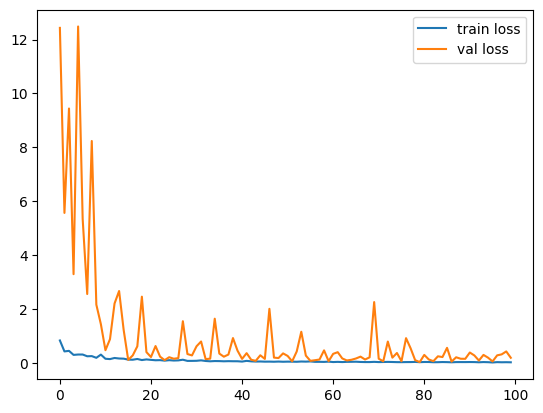

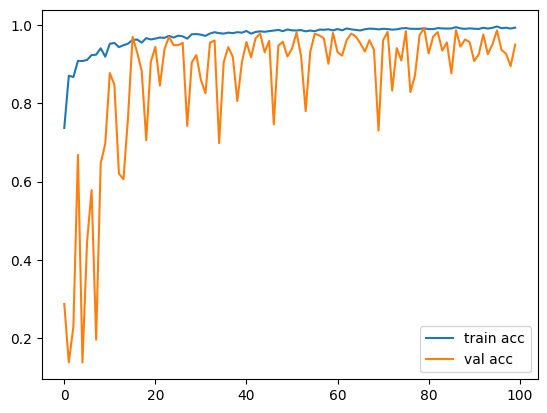

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# from tensorflow.keras.models import load_model

model.save('TOMATO_val95_epo_100.h5')